# Семинар 3. Новые признаки. Базовая визуализация

## Считываем данные

In [ ]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd
import numpy as np

Продолжаем работать с данными по Титанику:

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Описание признаков:

**PassengerId** - id пассажира

**Survived** выжил пассажирил (1) или нет (0)

**Pclass** - класс пассажира

**Name** - имя пассажира

**Sex** - пол пассажира

**Age** - возраст пассажира

**SibSp** - количество родственников (братьев, сестер, супругов) пассажира на борту

**Parch** - количество родственников (родителей / детей) пассажира на борту

**Ticket** - номер билета

**Fare** - тариф (стоимость билета)

**Cabin** - номер кабины

**Embarked** - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q = Queenstown)

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **Новый признак**

Иногда нужно создать новый признак из уже существующих, например, нам интересно, сколько всего родственников путешествовало с каждым пассажиром - просто сложим столбцы `SibSp` и `Parch` и поместим сумму в новый столбец `FamilySize`.

In [ ]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Функции

А теперь давайте создадим признак, который бы нам показывал, что пассажир ехал в одиночку.

Применим ее к столбцу `FamilySize` с помощью метода `.apply()`.

In [ ]:
def size(x):
  return x == 0

In [ ]:
data['Alone'] = data['FamilySize'].apply(size)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


### Анонимные функции (`lambda` функции)

Это же можно реализовать короче с помощью анонимных функций.

Это особый вид функций, которые объявляются с помощью ключевого слова `lambda` вместо `def`:
Лямбда-функции принимают любое количество аргументов, но не могут содержать несколько выражений и всегда возвращают только одно значение.

В программировании на **Python** можно обойтись без анонимных функций, которые по сути являются обычными, но без имени и с ограничением в одно выражение. Однако их использование в нужных местах упрощает написание и восприятие кода. Пишется так:

    lambda arguments: expression

arguments - аргументы, expression - выражение, возвращающее значение.

In [ ]:
data['Alone_1'] = data['FamilySize'].apply(lambda x: x == 0)
data['Alone_2'] = data['FamilySize'].apply(lambda x: 1 if x == 0 else 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Alone_1,Alone_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,False,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,False,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,True,1


## **C3**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Датасет содержит следующие признаки:

**category** - в какой категории находится блюдо (завтрак, десерты, рыба и курица и т.д)

**item** - название блюда

**calories** - количество калорий в блюде

**total_fat** - количество жиров (в процентах от дневной нормы)

**calcium** - количество кальция

**sugars** - количество углеводов

**protein** - количество белка

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/!hse_study/culture_python_andan_22_23/public_culture_22_23/sem/s10_fnctn/mcdonalds.csv')
df.head()

,category,item,calories,total_fat,calcium,sugars,protein
0,Breakfast,Egg McMuffin,300,20,25,3,17
1,Breakfast,Egg White Delight,250,12,25,3,18
2,Breakfast,Sausage McMuffin,370,35,25,2,14
3,Breakfast,Sausage McMuffin with Egg,450,43,30,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,25,2,21


Разбейте название каждого пункта меню (признак **item**) по пробелам и сохраните результат по одному слову в столбце. Например, если название было "Latte Coffee", то в этой строке в первом новом столбце должно появиться Latte, а во втором - Coffee. Найдите количество пунктов меню, в названии которых встречается сыр (Cheese).

Пример ответа: 28.00

Найдите в столбце **item** количество пунктов меню, в которыйх есть **Cheese**

In [ ]:
df.dtypes

category     object
item         object
calories      int64
total_fat     int64
calcium       int64
sugars        int64
protein       int64
dtype: object

In [ ]:
df["check"] = df["item"].apply(lambda x: "Cheese" in x)
df.head()

,category,item,calories,total_fat,calcium,sugars,protein,check
0,Breakfast,Egg McMuffin,300,20,25,3,17,False
1,Breakfast,Egg White Delight,250,12,25,3,18,False
2,Breakfast,Sausage McMuffin,370,35,25,2,14,False
3,Breakfast,Sausage McMuffin with Egg,450,43,30,2,21,False
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,25,2,21,False


In [ ]:
df[df["check"] == True].shape[0]

16

##  **Базовая визуализация**

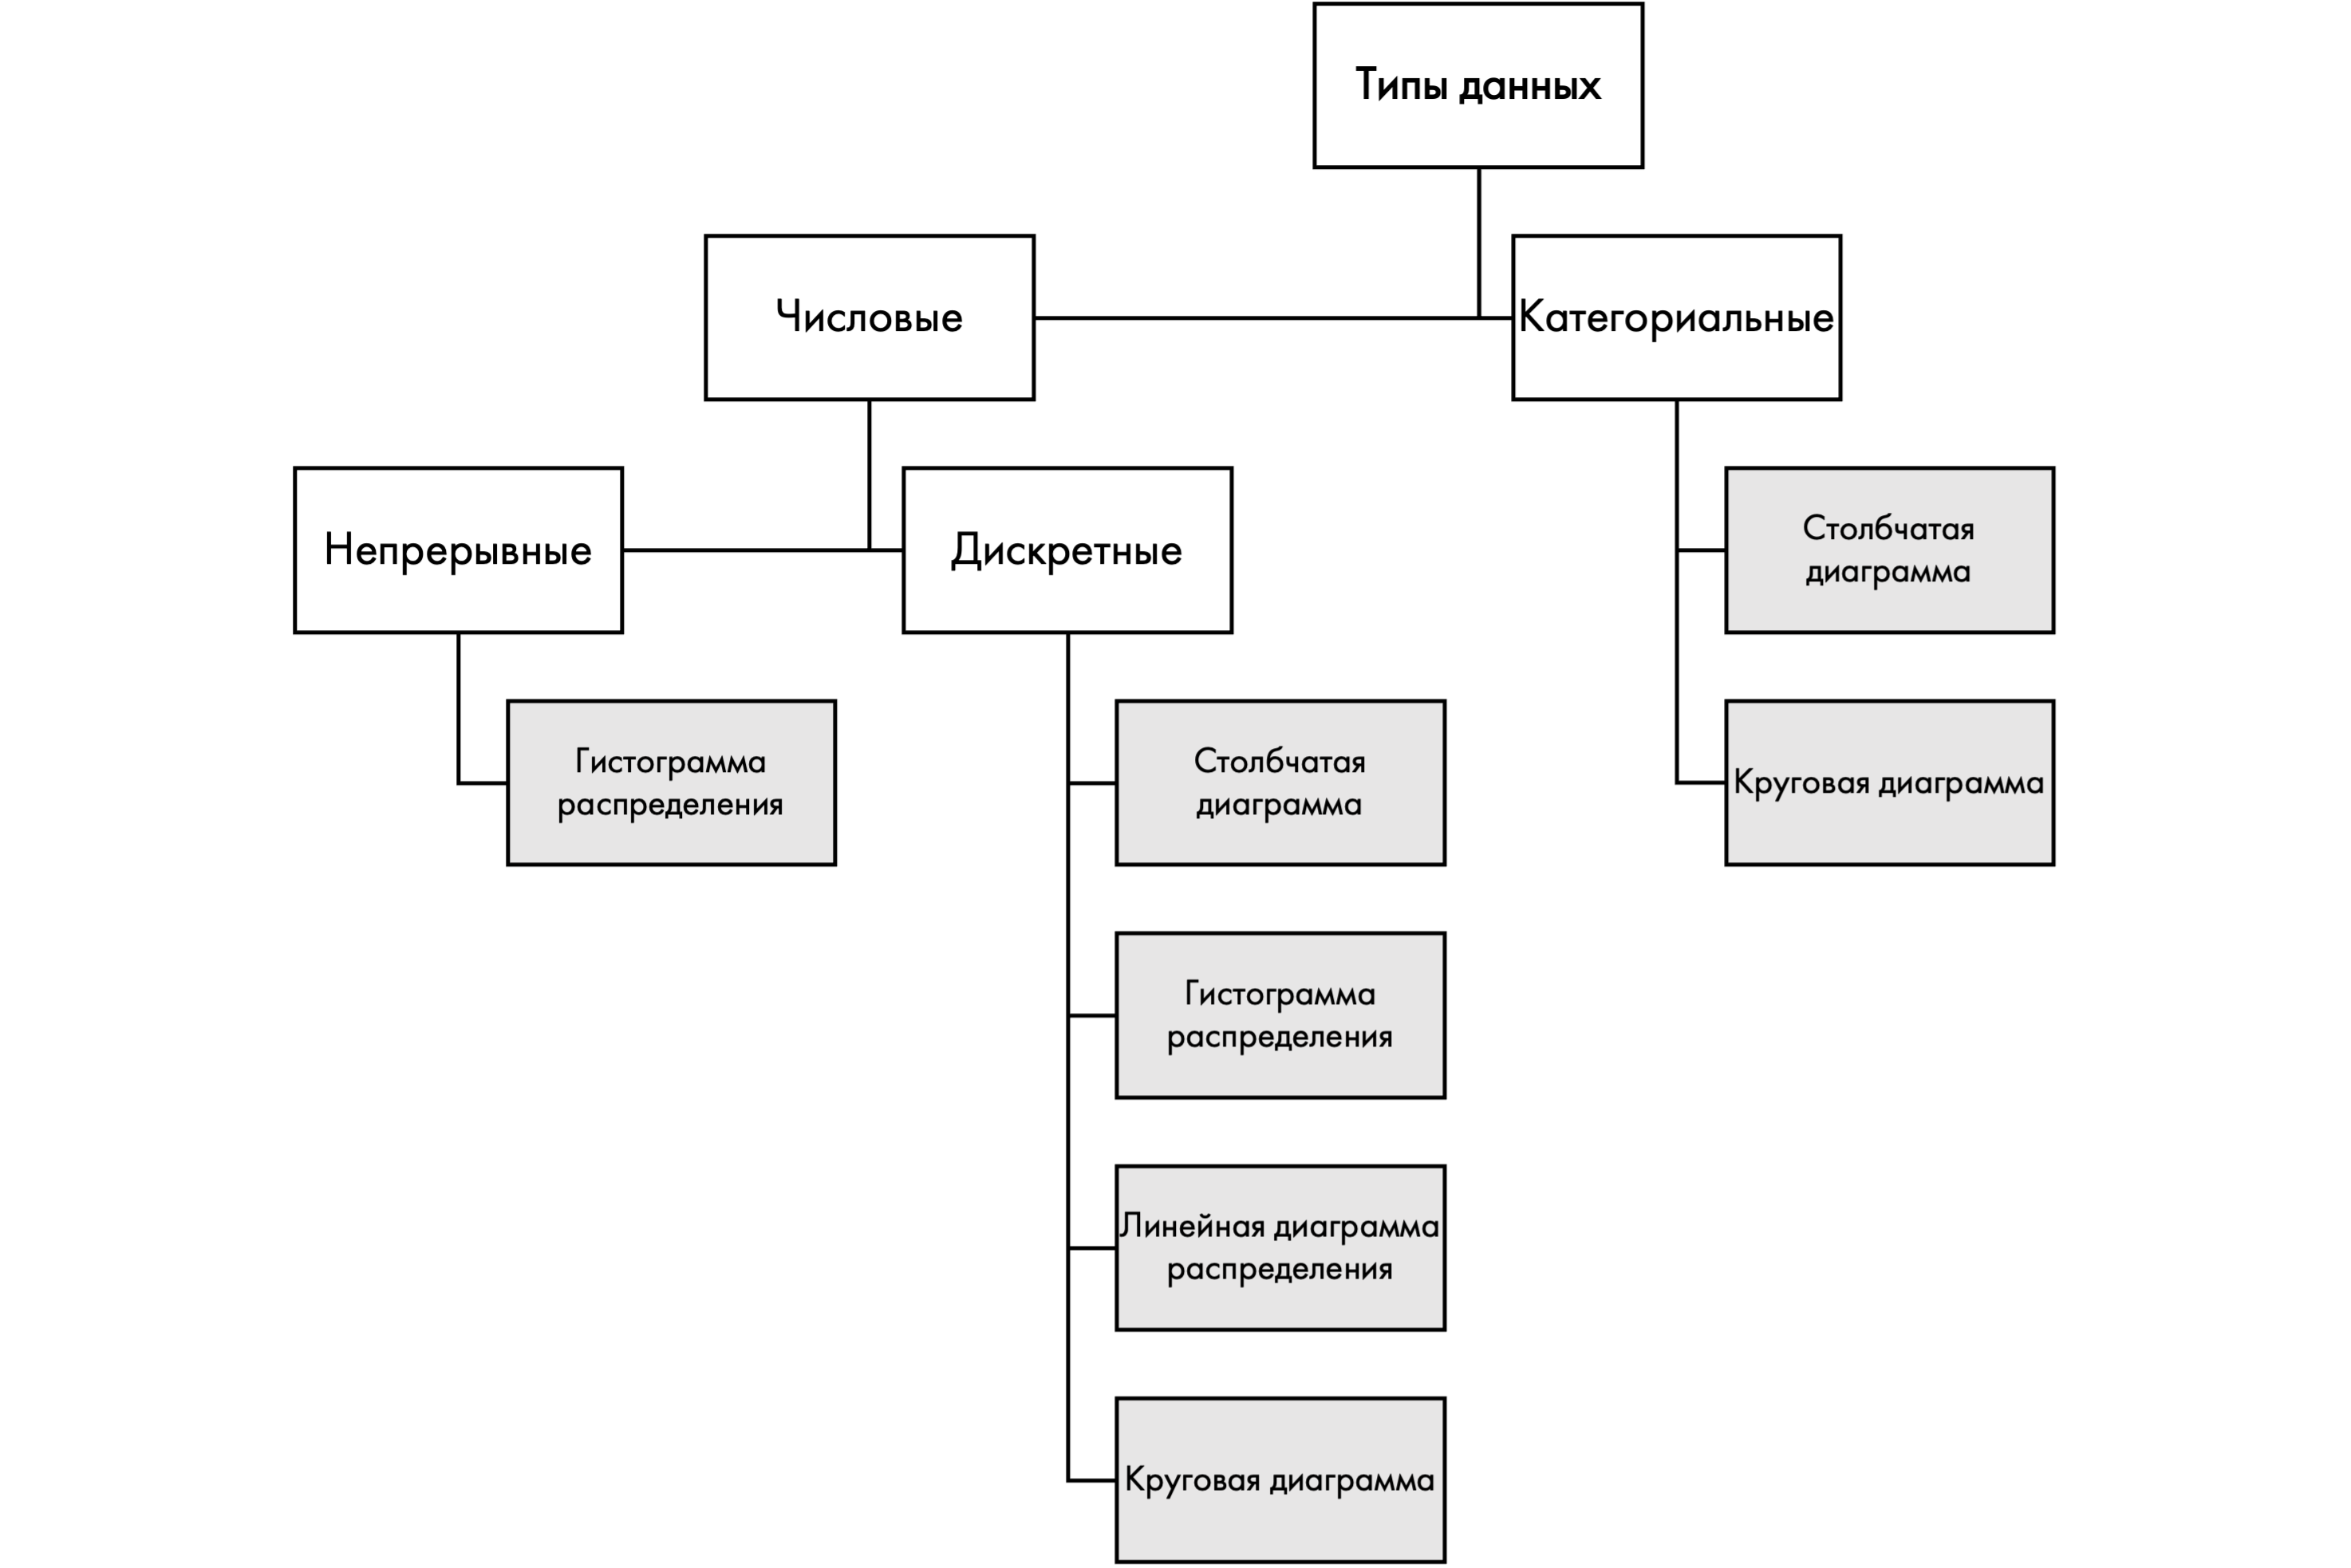

### Гистограмма распределения

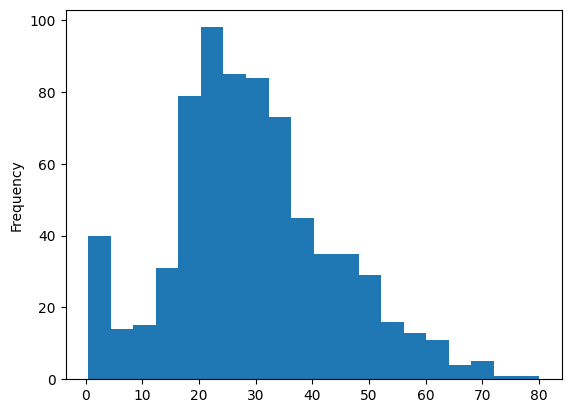

In [ ]:
data['Age'].plot(kind='hist', bins=20);

### Столбчатая диаграмма

In [ ]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

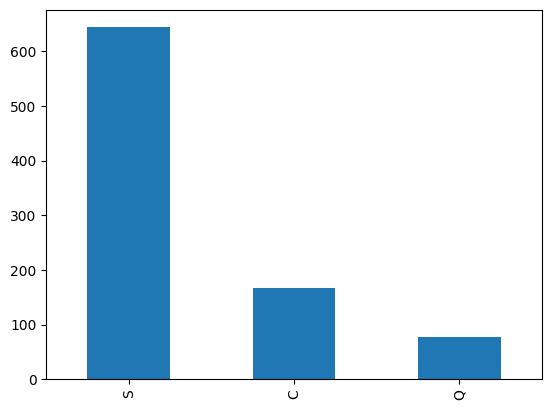

In [ ]:
data["Embarked"].value_counts().plot(kind = 'bar')

<Axes: >

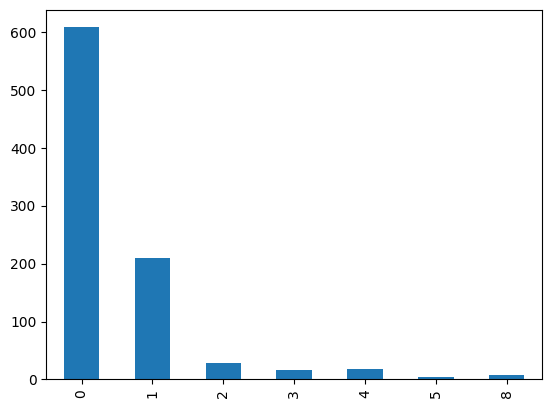

In [ ]:
data['SibSp'].value_counts().sort_index().plot(kind = 'bar')

### Линейная диаграмма распределения

<Axes: >

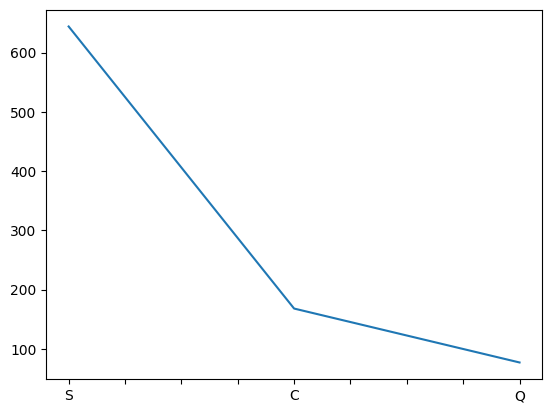

In [ ]:
data["Embarked"].value_counts().plot()

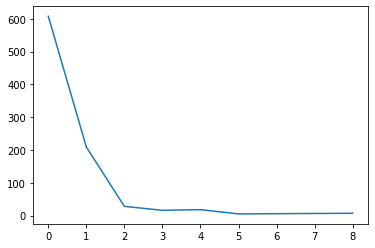

In [ ]:
df['SibSp'].value_counts().sort_index().plot()

### Круговая диаграмма

<AxesSubplot:ylabel='SibSp'>

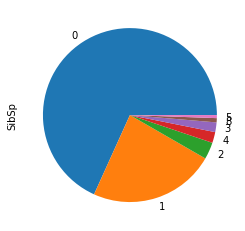

In [ ]:
df['SibSp'].value_counts().plot(kind = 'pie')